#Importing All the Dependencies

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pickle

Importing the dataset

In [183]:
#load the dataset
df = pd.read_excel('/content/customer_churn_large_dataset.xlsx')

##Analysing The Data And Pre-Process the Data

In [184]:
#printing the first five rows
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [185]:
#dropping unnecessary columns
df = df.drop(columns = ['CustomerID','Name'],axis = 1)

In [186]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [187]:
#printing the shape of the dataset
df.shape

(100000, 7)

In [188]:
#printing 10 random rows
df.sample(10)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
4871,34,Male,Los Angeles,11,77.19,157,0
6509,56,Male,Miami,21,72.76,64,0
46258,40,Male,New York,17,71.47,154,0
34340,50,Female,Los Angeles,1,94.37,499,1
22856,40,Male,Houston,3,49.09,405,0
37445,28,Male,Los Angeles,7,90.39,231,1
26192,45,Male,New York,5,97.28,204,1
51461,43,Female,Houston,19,79.18,370,0
79943,63,Female,Chicago,7,72.74,266,1
14743,53,Female,Miami,7,97.32,154,1


In [189]:
#checking for NULL values
df.isna().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [190]:
#printing the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [191]:
# Fetching the mathmatical results of numerical data
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [192]:
# Fetching the mathmatical results of categorical data
df.describe(include='O')

,Gender,Location
count,100000,100000
unique,2,5
top,Female,Houston
freq,50216,20157


In [193]:
#checking for duplicates
df.duplicated().sum()

0

In [194]:
#Counting each unique value of categorical data

print('Gender:')
print(df['Gender'].value_counts())
print('-'*30)

print('Location:')
print(df['Location'].value_counts())
print('-'*30)

print('Churn:')
print(df['Churn'].value_counts())
print('-'*30)

Gender:
Female    50216
Male      49784
Name: Gender, dtype: int64
------------------------------
Location:
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64
------------------------------
Churn:
0    50221
1    49779
Name: Churn, dtype: int64
------------------------------


In [195]:
# Checking the corelation between the columns
df.corr()

<ipython-input-195-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,0.001559,0.002328,-0.000211,-0.002842,1.000000


##Performing EDA for More Data Analysis

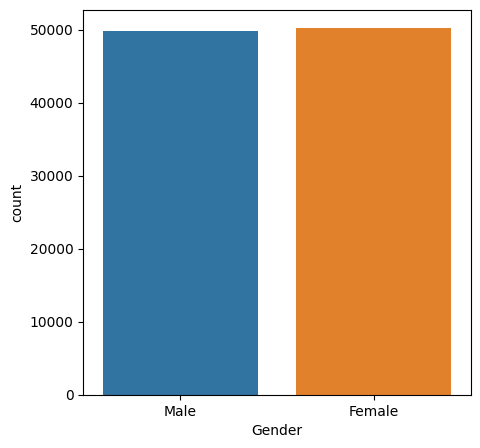

In [196]:
#ploting the count plot for columns
plt.figure(figsize = (5,5))
sns.countplot(x='Gender',data=df)
plt.show()

<Axes: ylabel='Location'>

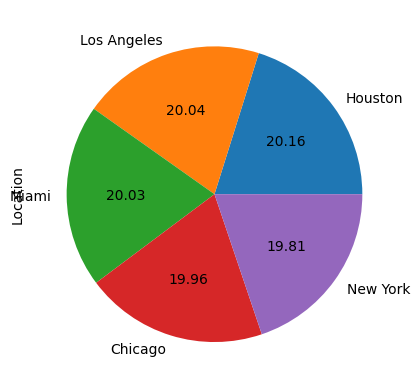

In [197]:
#plot the pie plot for columns
df['Location'].value_counts().plot(kind ='pie' ,autopct = '%.2f')

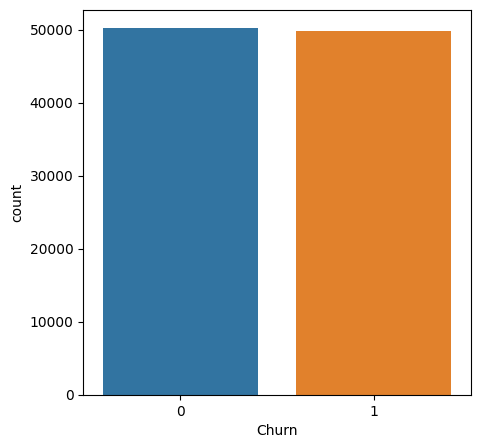

In [198]:
# check for imbalanced data
plt.figure(figsize = (5,5))
sns.countplot(x='Churn',data=df)
plt.show()

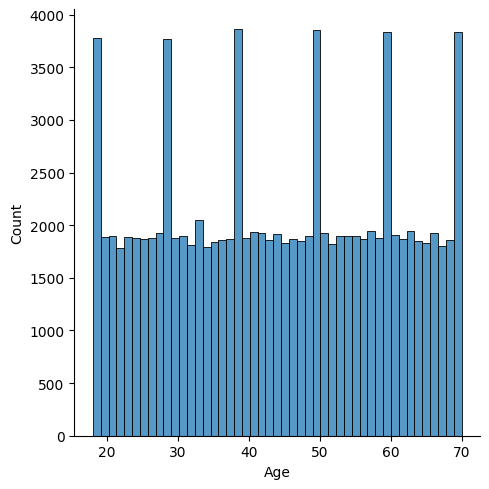

In [199]:
#ploting the histogram for columns
sns.displot(df['Age'])
plt.show()

<ipython-input-200-29923ba59938>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


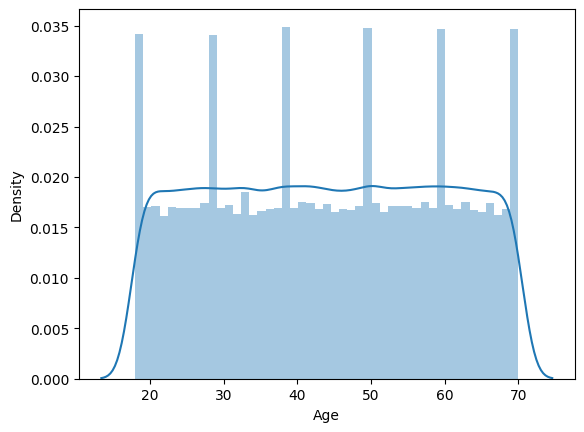

In [200]:
# ploting the distribution plot for each columns
sns.distplot(df['Age'])
plt.show()

<ipython-input-201-10be5ae8bee6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly_Bill'])


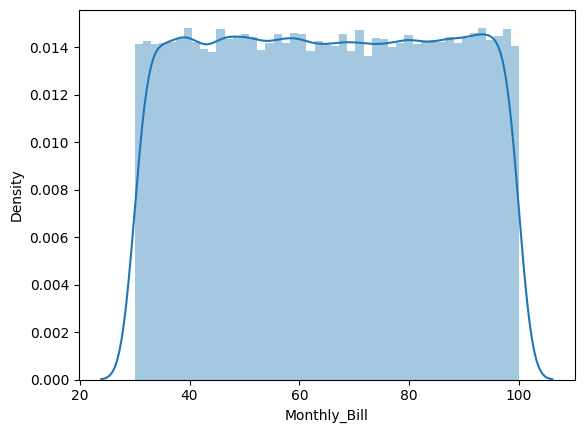

In [201]:
sns.distplot(df['Monthly_Bill'])
plt.show()

<ipython-input-202-24c61d5d4d9f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Subscription_Length_Months'])


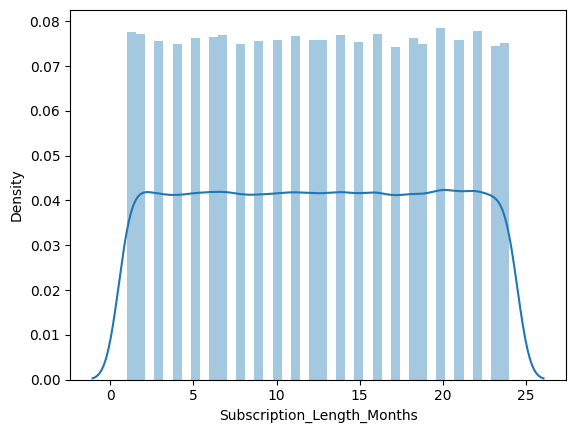

In [202]:
sns.distplot(df['Subscription_Length_Months'])
plt.show()

<ipython-input-203-8474f9ec5dcf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Usage_GB'])


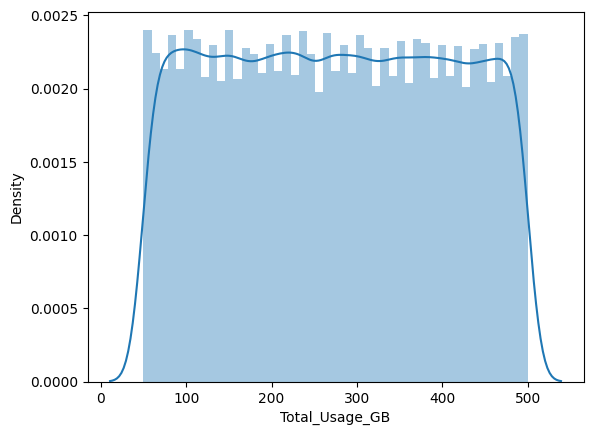

In [203]:
sns.distplot(df['Total_Usage_GB'])
plt.show()

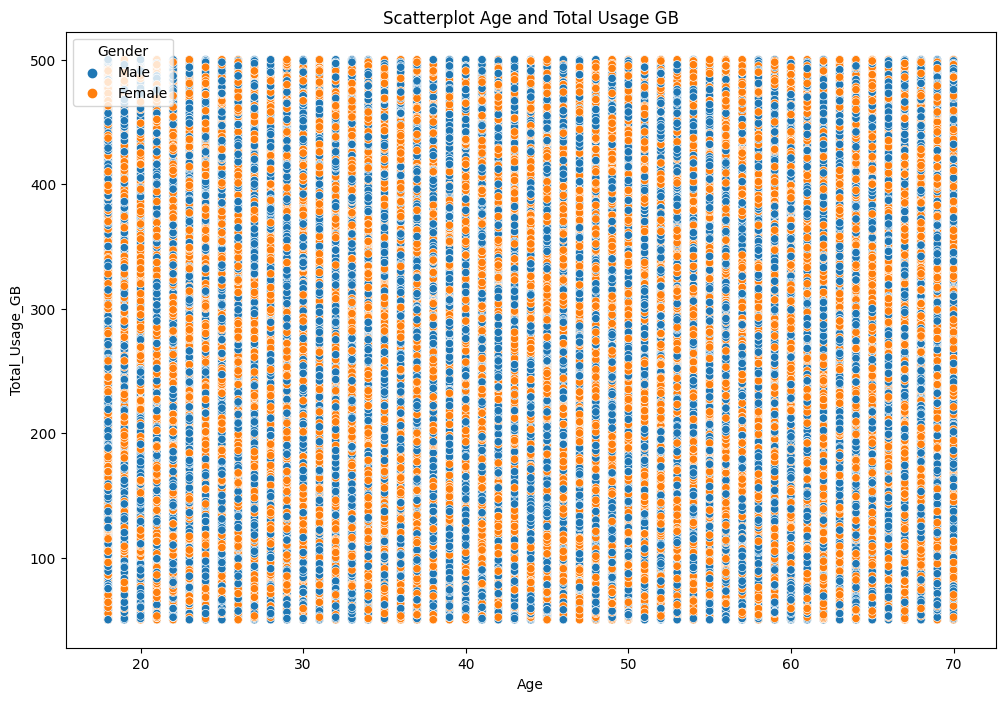

In [204]:
#plotting the scatter plot
plt.figure(figsize=(12,8))
plt.title('Scatterplot Age and Total Usage GB')
sns.scatterplot(x=df['Age'],y=df['Total_Usage_GB'],hue=df['Gender'])
plt.show()

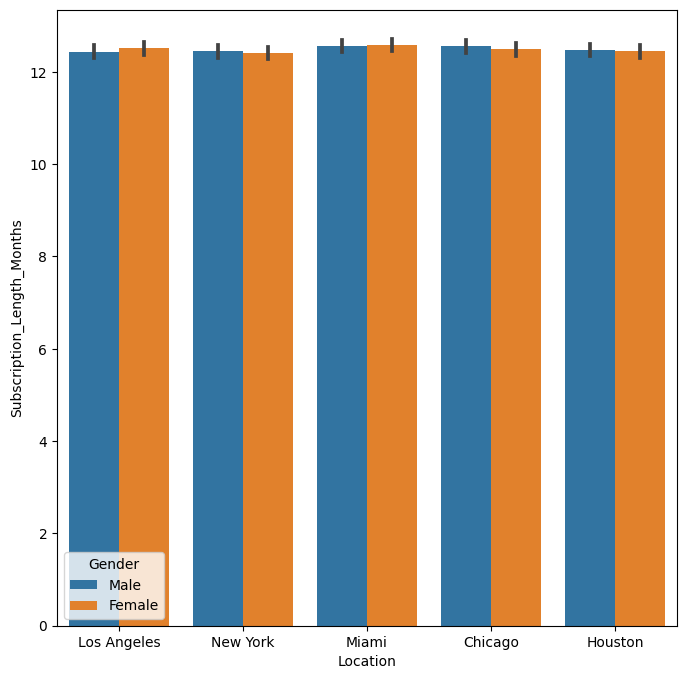

In [205]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Location'],y=df['Subscription_Length_Months'],hue = df['Gender'])
plt.show()

<ipython-input-206-77a8e35907e3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn']==0]['Age'],hist = False)
<ipython-input-206-77a8e35907e3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn']==1]['Age'],hist = False)


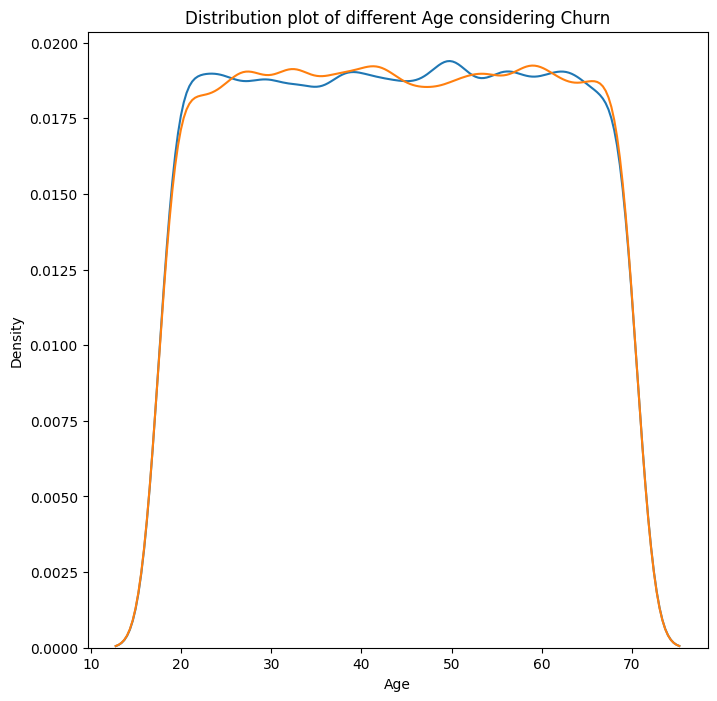

In [206]:
plt.figure(figsize=(8,8))
plt.title('Distribution plot of different Age considering Churn')
sns.distplot(df[df['Churn']==0]['Age'],hist = False)
sns.distplot(df[df['Churn']==1]['Age'],hist = False)
plt.show()

<ipython-input-207-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

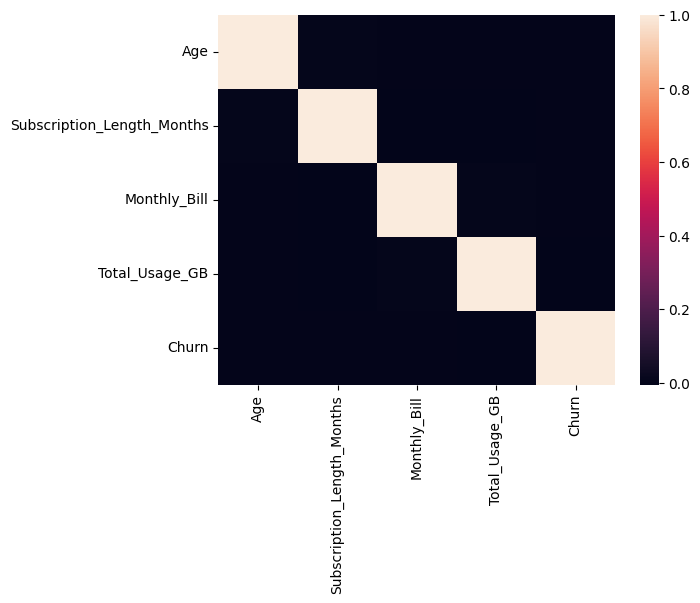

In [207]:
#plotting  the heat map to understand corelation better
sns.heatmap(df.corr())

In [208]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


##Feature Engineering

In [210]:
# Using Label Encoder for Encode the Categorical Values
en1 = LabelEncoder()

In [211]:
df['Gender'] = en1.fit_transform(df['Gender'])

In [212]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,Los Angeles,17,73.36,236,0
1,62,0,New York,1,48.76,172,0
2,24,0,Los Angeles,5,85.47,460,0
3,36,0,Miami,3,97.94,297,1
4,46,0,Miami,19,58.14,266,0


In [213]:
en2 = LabelEncoder()
df['Location'] = en2.fit_transform(df['Location'])

In [214]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


In [215]:
df = df.drop(columns=['Monthly_Bill'])

In [216]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [217]:
x.head()

,Age,Gender,Location,Subscription_Length_Months,Total_Usage_GB
0,63,1,2,17,236
1,62,0,4,1,172
2,24,0,2,5,460
3,36,0,3,3,297
4,46,0,3,19,266


In [218]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [219]:
#Performing the train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state =3)

In [220]:
print(x_train.shape,x_test.shape,x.shape)

(60000, 5) (40000, 5) (100000, 5)


In [221]:
# Scale the data using StandardScaler
scale = StandardScaler()

In [222]:
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [223]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x.columns)

In [224]:
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x.columns)

In [225]:
x_train_scaled.head()

,Age,Gender,Location,Subscription_Length_Months,Total_Usage_GB
0,-1.439098,1.003874,0.711672,-0.070007,-0.006887
1,0.391217,-0.996141,1.420074,-0.503350,1.362159
2,0.587322,1.003874,-0.705131,1.518918,0.513197
3,-1.635203,-0.996141,1.420074,1.230022,-0.978221
4,1.567848,-0.996141,1.420074,1.518918,0.146079


In [226]:
x_test_scaled.head()

,Age,Gender,Location,Subscription_Length_Months,Total_Usage_GB
0,0.064375,1.003874,0.003270,0.652232,-1.115890
1,-1.242993,1.003874,-1.413533,0.218889,-0.848200
2,-0.523941,1.003874,-1.413533,-1.658931,-1.039407
3,0.718059,1.003874,1.420074,-1.370035,-0.496378
4,-1.112256,1.003874,-1.413533,0.507784,-1.001166


##Model Building and Testing

Train Accuracy:  0.50565
Test Accuracy:  0.5002
Confusion Matrix: 
[[11702  8448]
 [11544  8306]]
Feature: 0, Score: 0.00326
Feature: 1, Score: 0.00837
Feature: 2, Score: 0.01435
Feature: 3, Score: 0.01448
Feature: 4, Score: 0.00651


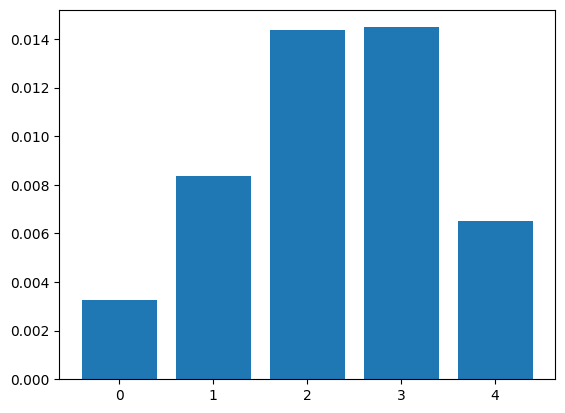

In [228]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_train_scaled)
print('Train Accuracy: ',accuracy_score(y_train,y_pred))

y_pred = lr.predict(x_test_scaled)
print('Test Accuracy: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))

importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [229]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Total_Usage_GB,Churn
0,63,1,2,17,236,0
1,62,0,4,1,172,0
2,24,0,2,5,460,0
3,36,0,3,3,297,1
4,46,0,3,19,266,0


In [230]:
#Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth = 50)
dt.fit(x_train_scaled,y_train)
y_pred = dt.predict(x_train_scaled)
print('Train Accuracy: ',accuracy_score(y_train,y_pred))

y_pred = dt.predict(x_test_scaled)
print('Test Accuracy: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))

Train Accuracy:  0.99765
Test Accuracy:  0.4996
Confusion Matrix: 
[[10042 10108]
 [ 9908  9942]]


In [231]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators =10)
rf.fit(x_train_scaled,y_train)
y_pred = rf.predict(x_train_scaled)
print('Train Accuracy: ',accuracy_score(y_train,y_pred))

y_pred = rf.predict(x_test_scaled)
print('Test Accuracy: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))

Train Accuracy:  0.9740333333333333
Test Accuracy:  0.50105
Confusion Matrix: 
[[11778  8372]
 [11586  8264]]


In [232]:
#XG Boost Classifier
xb = XGBClassifier()
xb.fit(x_train_scaled,y_train)
y_pred = xb.predict(x_train_scaled)
print('Train Accuracy: ',accuracy_score(y_train,y_pred))

y_pred = xb.predict(x_test_scaled)
print('Test Accuracy: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))

Train Accuracy:  0.6572833333333333
Test Accuracy:  0.500075
Confusion Matrix: 
[[10363  9787]
 [10210  9640]]


In [233]:
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_train_scaled)
print('Train Accuracy: ',accuracy_score(y_train,y_pred))

y_pred = knn.predict(x_test_scaled)
print('Test Accuracy: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))

Train Accuracy:  0.6878166666666666
Test Accuracy:  0.498
Confusion Matrix: 
[[10090 10060]
 [10020  9830]]


In [237]:
# Artificial Neural Network
model = Sequential()

model.add(Dense(16,activation='relu',input_dim = 5))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                96        
                                                                 
 dense_25 (Dense)            (None, 32)                544       
                                                                 
 dense_26 (Dense)            (None, 128)               4224      
                                                                 
 dense_27 (Dense)            (None, 32)                4128      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,537
Trainable params: 9,537
Non-traina

In [238]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [241]:
model.fit(x=x_train_scaled,y=y_train,epochs=50,validation_split = 0.1,batch_size = 100)

Epoch 1/50
540/540 [==============================] - 3s 5ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.4988
Epoch 2/50
540/540 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 3/50
540/540 [==============================] - 4s 8ms/step - loss: 0.6931 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 4/50
540/540 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 5/50
540/540 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 6/50
540/540 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.4988
Epoch 7/50
540/540 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.4988
Epoch 

In [242]:
y_log = model.predict(x_train_scaled)
y_pred = np.where(y_log > 0.5,1,0)

print('Accuracy_score:' ,accuracy_score(y_train,y_pred))

1875/1875 [==============================] - 2s 1ms/step
Accuracy_score: 0.5011833333333333


In [243]:
y_log = model.predict(x_test_scaled)
y_pred = np.where(y_log > 0.5,1,0)

print('Accuracy_score:' ,accuracy_score(y_test,y_pred))

1250/1250 [==============================] - 2s 1ms/step
Accuracy_score: 0.50375


##Building the PipeLine For Deployment

In [269]:
# Building each transformer for my pipeline

tr1 = ColumnTransformer([('labelencoder',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2])],remainder='passthrough')

tr2 = ColumnTransformer([('scale',StandardScaler(),slice(0,13))])

tr3 = XGBClassifier()

In [270]:
# Building the pipeline
pipe = make_pipeline(tr1,tr2,tr3)

In [263]:
df1 = pd.read_excel('/content/customer_churn_large_dataset.xlsx')

In [271]:
df1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [265]:
df1 = df1.drop(columns=['CustomerID','Name'])

In [256]:
df1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [272]:
x = df1.drop(columns = ['Churn'])
y = df1['Churn']

In [273]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [275]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('labelencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 13, None))])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [277]:
y_pred = pipe.predict(x_train)
print('Train Accuracy: ',accuracy_score(y_train,y_pred))

y_pred = pipe.predict(x_test)
print('Test Accuracy: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))

Train Accuracy:  0.655325
Test Accuracy:  0.5066
Confusion Matrix: 
[[5318 4655]
 [5213 4814]]


In [278]:
# Dump my pipeline into pickle file for further Deployment
pickle.dump(pipe,open('CustomerPipe.pkl','wb'))